In [143]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib

#Checking  Versions of libraries used

#print("Pandas version: Pandas {}".format(pd.__version__)) # Same way of printing as bellow

print(f"Pandas version: Pandas {pd.__version__}")
print(f"Numpy version: Pandas {np.__version__}")
print(f"Matplotlib version: Pandas {matplotlib.__version__}")
print(f"Seaborn version: Pandas {sns.__version__}")

#Magicfunctions for In-Notebook Display
%matplotlib inline

# Setting seabon style
sns.set(style='darkgrid', palette='deep')

Pandas version: Pandas 1.0.5
Numpy version: Pandas 1.19.0
Matplotlib version: Pandas 3.2.2
Seaborn version: Pandas 0.10.1


# Importing Data

In [144]:
# Train Data
train=pd.read_csv("train.csv")
#Test Data
test=pd.read_csv("test.csv")

# Data Overview

In [145]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [146]:
test.tail(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [147]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [148]:
train.shape

(891, 12)

In [149]:
test.shape

(418, 11)

# Data Preprocessing

In [150]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [151]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [152]:
test.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

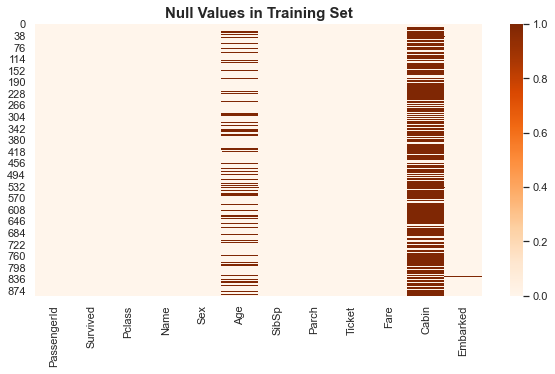

In [153]:
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),cmap='Oranges')
plt.title('Null Values in Training Set',fontsize=15,fontweight='bold');

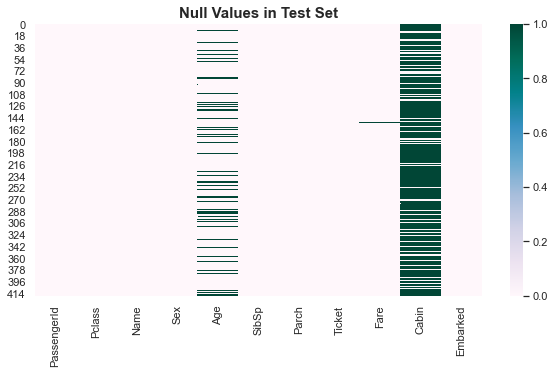

In [154]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(),cmap='PuBuGn')
plt.title('Null Values in Test Set',fontsize=15,fontweight='bold');

In [155]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

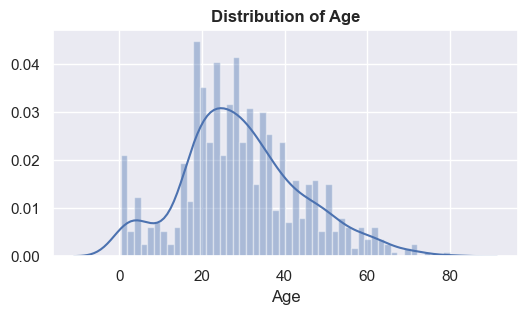

In [157]:
plt.figure(figsize=(6,3),dpi=100)
sns.distplot(train['Age'], bins=50)
plt.title('Distribution of Age', fontweight='bold')
plt.show()

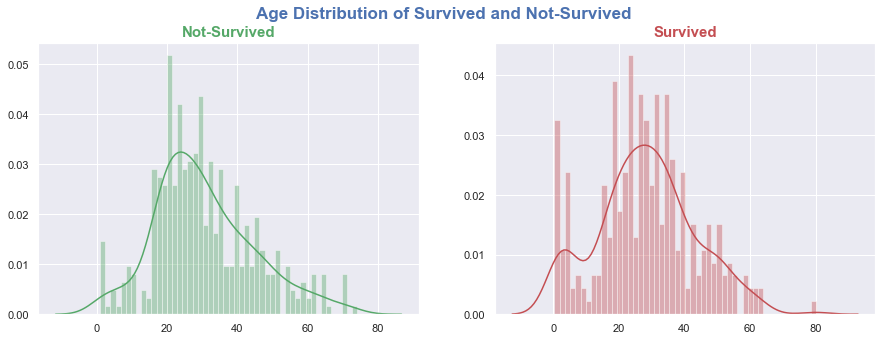

In [158]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
fig.suptitle('Age Distribution of Survived and Not-Survived',fontsize = 17,color='b', fontweight='bold')


sns.distplot(train[train['Survived']==0]['Age'].values , color = 'g' , ax = axs[0], bins=50)
axs[0].set_title("Not-Survived",color='g', fontsize = 15, fontweight='bold')

sns.distplot(train[train['Survived']==1]['Age'].values , color = 'r' , ax = axs[1],bins=50)
axs[1].set_title("Survived",color='r', fontsize = 15, fontweight='bold')

plt.show()

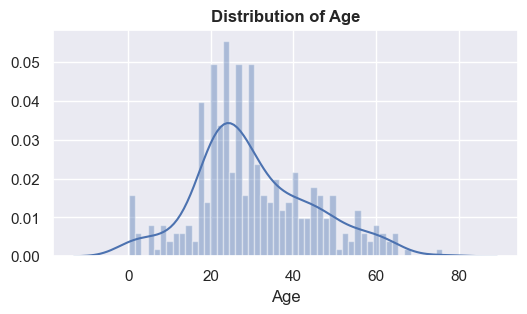

In [159]:
plt.figure(figsize=(6,3),dpi=100)
sns.distplot(test['Age'], bins=50)
plt.title('Distribution of Age', fontweight='bold')
plt.show()

In [160]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

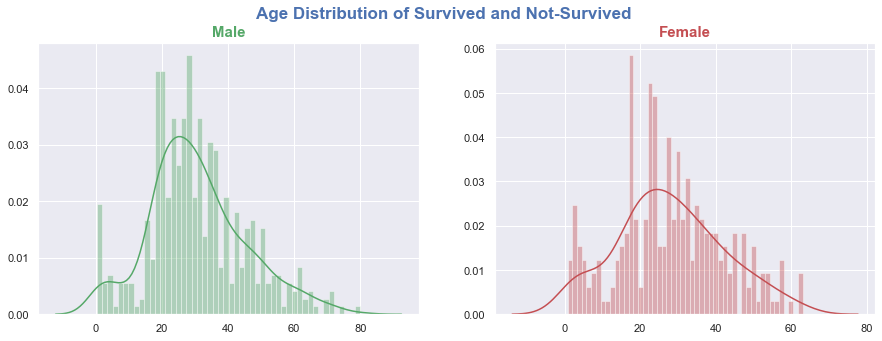

In [161]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
fig.suptitle('Age Distribution of Survived and Not-Survived',fontsize = 17,color='b', fontweight='bold')


sns.distplot(train[train['Sex']=='male']['Age'].values , color = 'g' , ax = axs[0], bins=50)
axs[0].set_title("Male",color='g', fontsize = 15, fontweight='bold')

sns.distplot(train[train['Sex']=='female']['Age'].values , color = 'r' , ax = axs[1],bins=50)
axs[1].set_title("Female",color='r', fontsize = 15, fontweight='bold')

plt.show() 

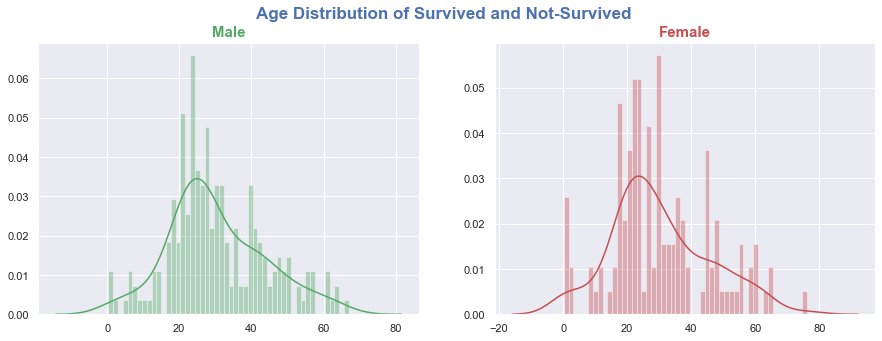

In [162]:
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,5))
fig.suptitle('Age Distribution of Survived and Not-Survived',fontsize = 17,color='b', fontweight='bold')


sns.distplot(test[test['Sex']=='male']['Age'].values , color = 'g' , ax = axs[0], bins=50)
axs[0].set_title("Male",color='g', fontsize = 15, fontweight='bold')

sns.distplot(test[test['Sex']=='female']['Age'].values , color = 'r' , ax = axs[1],bins=50)
axs[1].set_title("Female",color='r', fontsize = 15, fontweight='bold')

plt.show()

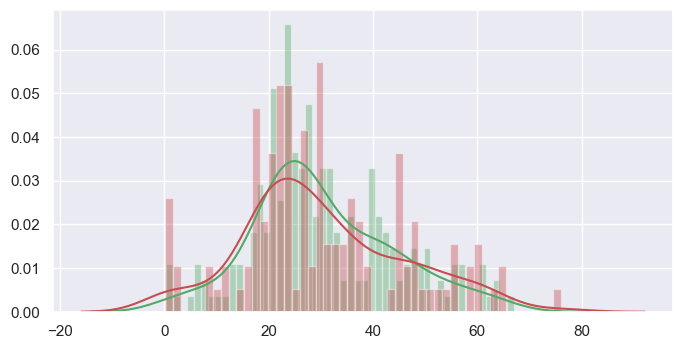

In [163]:
plt.figure(figsize=(8,4),dpi=100)
sns.distplot(test[test['Sex']=='male']['Age'].values , color = 'g',bins=50)
sns.distplot(test[test['Sex']=='female']['Age'].values , color = 'r',bins=50)
plt.show()

In [164]:
print('Mean Age:')
print(f"Male : {train[(train.Sex=='male')].Age.mean()}")
print(f"Female : {train[(train.Sex=='female')].Age.mean()}")
print("\n")
print('Median Age:')
print(f"Male : {train[(train.Sex=='male')].Age.median()}")
print(f"Female : {train[(train.Sex=='female')].Age.median()}")
print("\n")

Mean Age:
Male : 30.72664459161148
Female : 27.915708812260537


Median Age:
Male : 29.0
Female : 27.0




In [165]:
train.loc[(train['Age'].isnull())&(train['Sex']=='male'),'Age']=train[(train.Sex=='male')].Age.mean()
train.loc[(train['Age'].isnull())&(train['Sex']=='female'),'Age']=train[(train.Sex=='female')].Age.mean()

test.loc[(test['Age'].isnull())&(test['Sex']=='male'),'Age']=test[(test.Sex=='male')].Age.mean()
test.loc[(test['Age'].isnull())&(test['Sex']=='female'),'Age']=test[(test.Sex=='female')].Age.mean()

In [166]:
train.Age.isnull().sum()

0

In [167]:
test.Fare.isnull().sum()

1

In [168]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


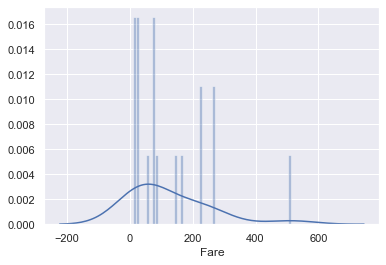

In [169]:
sns.distplot(test[test.Age>55].Fare, bins=50)

In [170]:
test[test.Age>55].Fare.mean()

126.18148888888891

In [171]:
test[test.Age>55].Fare.median()

77.57085000000001

In [172]:
test.loc[(test['Fare'].isnull()),'Fare']=test[test.Age>55].Fare.median()

In [173]:
test['Fare'].isnull().sum()

0

In [174]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [175]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [176]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [177]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [178]:
train=train[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']]

In [179]:
test=test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked']]

In [180]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [181]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [182]:
train.dropna(axis=0, how="any", inplace=True)

In [183]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [184]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [185]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [186]:
train.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

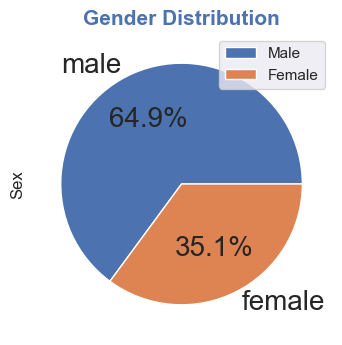

In [187]:
plt.figure(figsize=(4,4), dpi=100)
train["Sex"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Gender Distribution",color='b', fontsize = 15,fontweight='bold')
plt.legend(["Male", "Female"])
plt.show()

In [188]:
# train_raw=train
# test_raw=test

In [189]:
train['Sex'].replace(['male','female'],[1,0],inplace=True)

In [190]:
test['Sex'].replace(['male','female'],[1,0],inplace=True)

In [191]:
train.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

In [192]:
test.Sex.value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [193]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

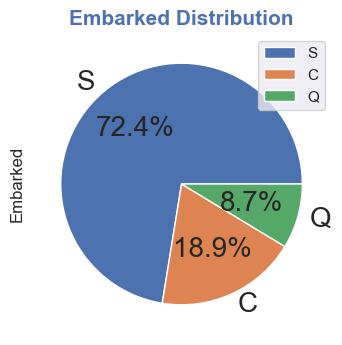

In [194]:
plt.figure(figsize=(4,4), dpi=100)
train["Embarked"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Embarked Distribution",color='b', fontsize = 15,fontweight='bold')
plt.legend(["S", "C","Q"])
plt.show()

In [195]:
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)

In [196]:
train.Embarked.value_counts()

0    644
1    168
2     77
Name: Embarked, dtype: int64

In [197]:
test.Embarked.value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [198]:
train.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

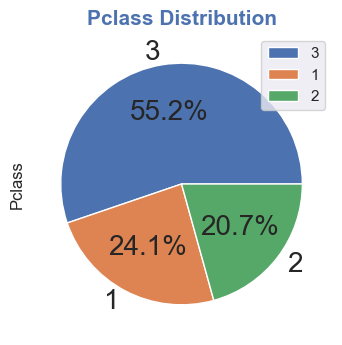

In [199]:
plt.figure(figsize=(4,4), dpi=100)
train["Pclass"].value_counts().plot(kind = 'pie', autopct='%1.1f%%', fontsize = 20)
plt.title("Pclass Distribution",color='b', fontsize = 15,fontweight='bold')
plt.legend(["3", "1","2"])
plt.show()

In [200]:
train.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

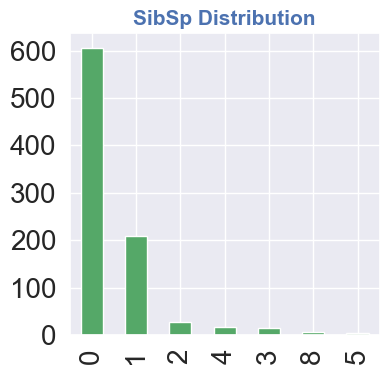

In [201]:
plt.figure(figsize=(4,4),dpi=100)
train["SibSp"].value_counts().plot(kind = 'bar', fontsize = 20, color='g')
plt.title("SibSp Distribution",color='b', fontsize = 15,fontweight='bold')
plt.show()

In [202]:
train.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

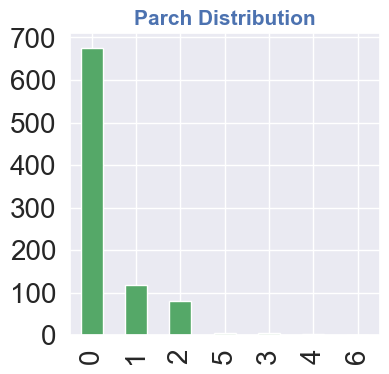

In [203]:
plt.figure(figsize=(4,4),dpi=100)
train["Parch"].value_counts().plot(kind = 'bar', fontsize = 20, color='g')
plt.title("Parch Distribution",color='b', fontsize = 15,fontweight='bold')
plt.show()

In [204]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.690446,0.524184,0.382452,32.096681,0.362205
std,256.998173,0.486260,0.834700,0.477538,12.981441,1.103705,0.806761,49.697504,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,446.000000,0.000000,3.000000,1.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [205]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 83.3+ KB


# Outlier Handling

# Fare_Train

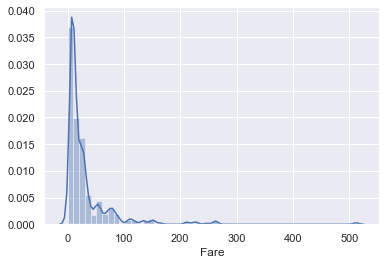

In [207]:
sns.distplot(train.Fare)

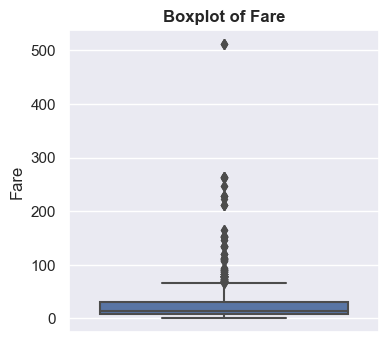

In [208]:
plt.figure(figsize=(4,4), dpi=100)
sns.boxplot(y='Fare', data=train)
plt.title('Boxplot of Fare', fontweight='bold')
plt.show()

In [209]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

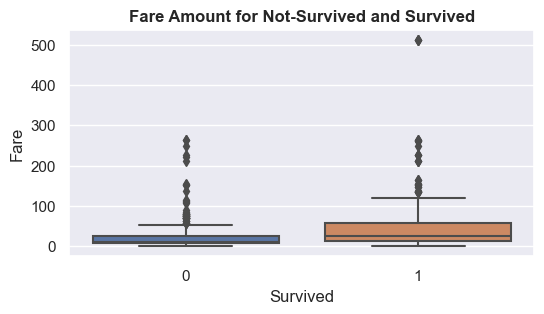

In [210]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(x='Survived',y='Fare', data=train)
plt.title('Fare Amount for Not-Survived and Survived', fontweight='bold')
plt.show()

In [211]:
train=train[train.Fare<300]

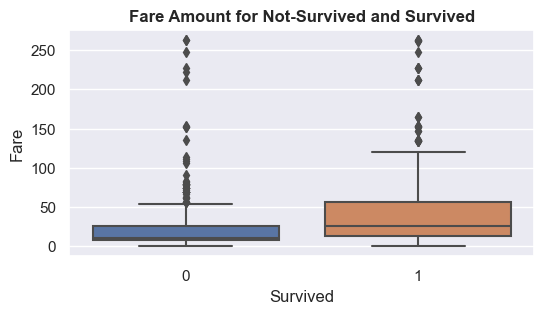

In [212]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(x='Survived',y='Fare', data=train)
plt.title('Fare Amount for Not-Survived and Survived', fontweight='bold')
plt.show()

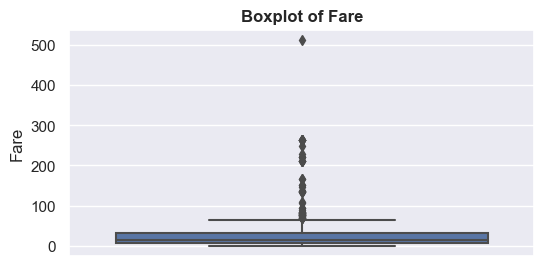

In [213]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(y='Fare', data=test)
plt.title('Boxplot of Fare', fontweight='bold')
plt.show()

In [214]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [215]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


# Age_Train

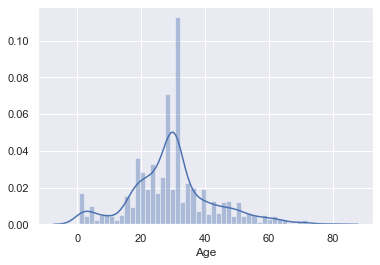

In [216]:
sns.distplot(train.Age, bins=50)

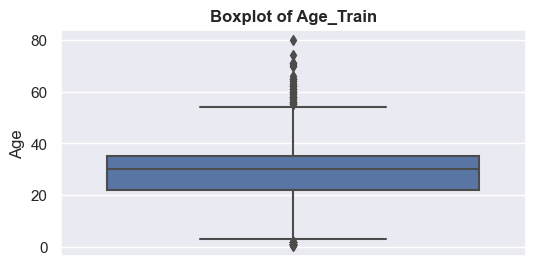

In [217]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(y='Age', data=train)
plt.title('Boxplot of Age_Train', fontweight='bold')
plt.show()

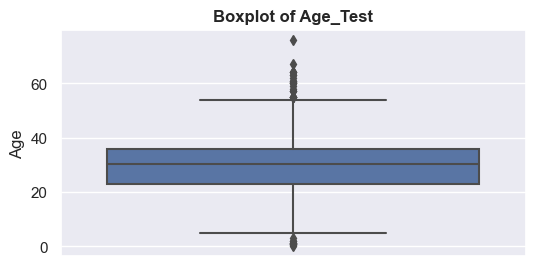

In [218]:
plt.figure(figsize=(6,3),dpi=100)
sns.boxplot(y='Age', data=test)
plt.title('Boxplot of Age_Test', fontweight='bold')
plt.show()

# Creating dependent and Independent Veriables

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    int64  
 5   Age          886 non-null    float64
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         886 non-null    float64
 10  Embarked     886 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 123.1+ KB


In [220]:
train.reset_index(inplace=True)

In [256]:
train.shape

(886, 12)

In [257]:
test.shape

(418, 10)

In [258]:
train.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [259]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [260]:
test.PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [261]:
y_train=train['Survived'].values

In [262]:
X_train=train[['Pclass','Sex', 'SibSp',
        'Parch','Embarked', 'Fare','Age']]

In [263]:
X_train.shape

(886, 7)

In [264]:
X_test=test[['Pclass', 'Sex', 'SibSp',
        'Parch', 'Embarked', 'Fare','Age']]

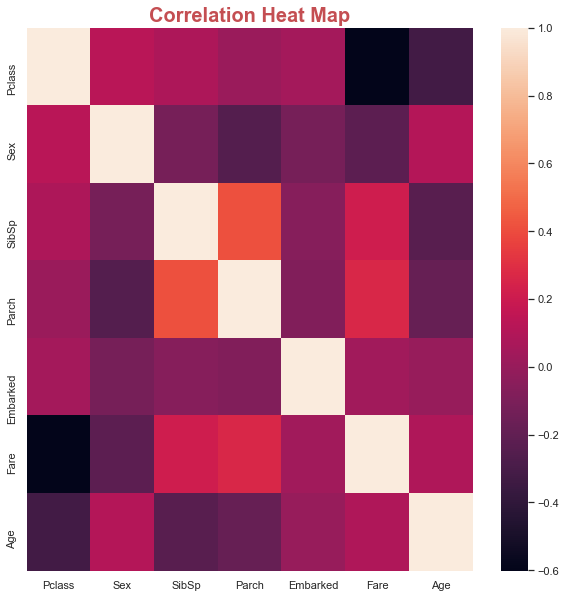

In [265]:
# Plotting a Correlation plot between cloumns
plt.figure(figsize = (10,10))
plt.title("Correlation Heat Map", fontsize=20, color='r', fontweight='bold')
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix)
plt.show()

In [266]:
# Importing Logistic Regression Library
from sklearn.linear_model import LogisticRegression
# Importing Libraries
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [280]:
# Creating object and running algorithm
svm = SVC()
svm.fit( X_train, y_train )


# Predicting Test Data
y_pred = svm.predict(X_test)

In [281]:

# Predicting Test Data
y_pred = rfc.predict(X_test)

In [282]:
y_pred.shape

(418,)

In [283]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0


In [284]:
PassengerId=test.PassengerId.values

In [285]:
Survived=y_pred

In [286]:
PassengerId.shape

(418,)

In [287]:
Survived.shape

(418,)

In [288]:
op = pd.DataFrame()

In [289]:
op['PassengerId']=PassengerId

In [290]:
op['Survived']=Survived

In [291]:
op.Survived.value_counts()

0    275
1    143
Name: Survived, dtype: int64

In [279]:
op.to_csv('result2.csv',index=False)